In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import Levenshtein
from fuzzywuzzy import process
from datetime import date
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel(r"C:\Users\india\Downloads\data.xlsx")

In [3]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Shape of the dataset

In [4]:
df.shape

(3998, 39)

## Statistical Summary of the dataset

In [5]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


## Columns in dataset

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

## Number of unique values in the each column

In [8]:
print(df.nunique())

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [9]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


## Data Cleaning

* Duplicates
* Structural Errors
* Missing Values 
* Outliers
* Type casting

## Duplicates

In [10]:
df.duplicated().sum()

0

## Structural Errors

In [11]:
# finding the unique values

In [12]:
for i in df.columns:
    print('--'*20,i,'--'*20)
    print(df[i].unique())

---------------------------------------- Unnamed: 0 ----------------------------------------
['train']
---------------------------------------- ID ----------------------------------------
[203097 579905 810601 ... 355888 947111 324966]
---------------------------------------- Salary ----------------------------------------
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  

## Data cleaning for categorical columns

In [13]:
df['Unnamed: 0'].unique()

array(['train'], dtype=object)

In [14]:
df['Gender'] = df['Gender'].replace('f', 'Female')
df['Gender'] = df['Gender'].replace('m', 'Male')
print(df['Gender'].value_counts())

Gender
Male      3041
Female     957
Name: count, dtype: int64


In [15]:
df['Designation'] = df['Designation'].str.capitalize()
df['Designation'] = df['Designation'].str.strip()
df['Designation'] = df['Designation'].str.replace('Sr.', 'Senior')
df['Designation'] = df['Designation'].str.replace('Jr.', 'Junior')

In [16]:
df['Designation'] = df['Designation'].str.replace('Systems engineer', 'System engineer')

In [17]:
print('TOP 10 DESIGNATIONS IN THE DATASET ARE')
df['Designation'].value_counts().head(10)

TOP 10 DESIGNATIONS IN THE DATASET ARE


Designation
Software engineer             539
System engineer               323
Software developer            265
Programmer analyst            139
Java software engineer        111
Software test engineer        100
Project engineer               77
Technical support engineer     76
Senior software engineer       72
Java developer                 67
Name: count, dtype: int64

In [18]:
df['Designation'] = df['Designation'].str.replace('Programmer analyst', 'Programming analyst')

In [19]:
df['Designation'] = df['Designation'].str.replace('Programming analyst trainee', 'Programming analyst')
df['Designation'] = df['Designation'].str.replace('Program analyst trainee', 'Programming analyst')

In [20]:
df['Designation'] = df['Designation'].str.replace('Software engineer trainee','Software engineer')
df['Designation'] = df['Designation'].str.replace('Trainee software engineer','Software engineer')
df['Designation'] = df['Designation'].str.replace('Software trainee engineer','Software engineer')
df['Designation'] = df['Designation'].str.replace('Software enginner','Software engineer')
df['Designation'] = df['Designation'].str.replace('Software engineere','Software engineer')
df['Designation'] = df['Designation'].str.replace('Junior sofware engineer','Software engineer') 

In [21]:
df['10board'] = df['10board'].str.strip()
df['10board'] = df['10board'].str.capitalize()

In [22]:
df['10board'].isnull().sum()

350

In [23]:
def board(i):
    if ((i=="Cbse")|(i=="All india board")|(i=='Central board of secondary education')|(i=="Matriculation")|(i=='Certificate of middle years program of ib')| (i=="Central board of secondary education, new delhi")|(i=="Cbsc")|(i=='Cgbse raipur')):
        return "Cbse"
    elif ((i=="Isc")|(i=="Icse")|(i=="Isc board")|(i=="Isce")|(i=="Cicse")|(i=="Isce board")|(i=="New delhi")):
        return "Icse"
    elif ((i=='SSC')|(i=='Up board')|(i=='State')|(i=='Sslc')|(i=='Sslc')|(i=='Sslc')|(i=='Stateboard')):
        return "State board"
    else:
        return "State board"
df['10board'] = df['10board'].apply(board)

In [24]:
df['JobCity'] = df['JobCity'].str.strip()
df['JobCity'] = df['JobCity'].str.capitalize()

In [25]:
df['JobCity'] = df['JobCity'].replace(['Banglore','Banagalore','Bengaluru','Banaglore'],'Bangalore' )
df['JobCity'] = df['JobCity'].replace('Nouda','Noida')
df['JobCity'] = df['JobCity'].replace(['Bhubaneshwar', 'Bhubneshwar'],'Bhubaneswar')
df['JobCity'] = df['JobCity'].replace(['Gurgoan', 'Guragaon', 'Gurga'],'Gurgaon')
df['JobCity'] = df['JobCity'].replace(['Ghaziabad',  'Gajiabaad'],'Gaziabaad')
df['JobCity'] = df['JobCity'].replace('Hderabad','Hyderabad')
df['JobCity'] = df['JobCity'].replace('Keral','Kerala')
df['JobCity'] = df['JobCity'].replace(['Kolkata`', 'Calicut'],'Kolkata')
df['JobCity'] = df['JobCity'].replace('Muzzafarpur', 'Muzaffarpur')
df['JobCity'] = df['JobCity'].replace('Navi mumbai , hyderabad', 'Navi mumbai')
df['JobCity'] = df['JobCity'].replace(['New delhi - jaisalmer', 'New dehli'], 'New delhi')
df['JobCity'] = df['JobCity'].replace(['Kochi/cochin','Kochi/cochin, chennai and coimbatore'], 'Kochi')
df['JobCity'] = df['JobCity'].replace('Punr', 'Pune')
df['JobCity'] = df['JobCity'].replace('Punchkula', 'Panchkula')
df['JobCity'] = df['JobCity'].replace(['Pondy', 'Pondi'], 'Pondicherry')
df['JobCity'] = df['JobCity'].replace('Trivandrum', 'Thiruvananthapuram')
df['JobCity'] = df['JobCity'].replace('Tirupathi', 'Tirupati')
df['JobCity'] = df['JobCity'].replace(['Vsakhapttnam', 'Vizag'], 'Visakhapatnam')
df['JobCity'] = df['JobCity'].replace(['Chennai, bangalore', 'Chennai & mumbai'], 'Chennai')
df['JobCity'] = df['JobCity'].replace('Gandhinagar', 'Gandhi nagar')
df['JobCity'] = df['JobCity'].replace('Asifabadbanglore', 'Asifabad')

In [26]:
df['JobCity'].value_counts().tail(20)

JobCity
Al jubail,saudi arabia    1
Muvattupuzha              1
Una                       1
Jammu                     1
Shimla                    1
Burdwan                   1
Jaspur                    1
Tornagallu                1
Bharuch                   1
Technopark, trivandrum    1
Daman and diu             1
Salem                     1
Bhagalpur                 1
Rohtak                    1
Vandavasi                 1
Dharmapuri                1
Nanded                    1
Bankura                   1
Ernakulam                 1
Asifabad                  1
Name: count, dtype: int64

In [27]:
df['JobCity'].fillna('Unknown', inplace=True)

In [28]:
df['12board'] = df['12board'].str.strip()
df['12board'] = df['12board'].str.capitalize()
df['12board'] = df['12board'].replace(np.nan, 'unknow')

In [29]:
def board12(i):
    if ((i=="Cbse")| (i=="Chse")|(i=="All india board")|(i=='Central board of secondary education')|(i=="Matriculation")|(i=='Certificate of middle years program of ib')| (i=="Central board of secondary education, new delhi")|(i=="Cbsc")|(i=="Cbse,new delhi")|(i=="Chsc")|(i=='Cgbse raipur')):
        return "CBSE"
    elif ((i=="Isc")|(i=="Icse")|(i=="Isc board")|(i=="Isce")|(i=="Cicse")|(i=="Isce board")|(i=="New delhi")):
        return "ICSE"
    elif ((i=='SSC')|(i=='Ipe')|(i=='State')|(i=='Intermediate')|(i=='Sslc')|(i=='Sslc')|(i=='Stateboard')):
        return "State board"
    else:
        return "State board"
df['12board'] = df['12board'].apply(board)

In [30]:
df['Specialization'] = df['Specialization'].str.strip()
df['Specialization'] = df['Specialization'].str.capitalize()

In [31]:
df['Specialization'].value_counts()

Specialization
Electronics and communication engineering      880
Computer science & engineering                 744
Information technology                         660
Computer engineering                           600
Computer application                           244
Mechanical engineering                         201
Electronics and electrical engineering         196
Electronics & telecommunications               121
Electrical engineering                          82
Electronics & instrumentation eng               32
Civil engineering                               29
Electronics and instrumentation engineering     27
Information science engineering                 27
Instrumentation and control engineering         20
Electronics engineering                         19
Biotechnology                                   15
Other                                           13
Industrial & production engineering             10
Applied electronics and instrumentation          9
Chemical enginee

In [32]:
def Specialization(i):
    if (i=="Computer engineering")|(i=="Computer science & engineering")|(i=="Computer application")|(i=="Electronics and computer engineering")|(i=="Computer science and technology")|(i=="Computer and communication engineering")|(i=="Computer networking")|(i=="Computer science"):
        return "CSE"
    elif (i=="Electronics and communication engineering")|(i=="Electronics & telecommunications")|(i=="Electronics engineering")|(i=="Electronics"):
        return "ECE"
    elif (i=="Applied electronics and instrumentation")|(i=="Electronics & instrumentation eng")|(i=="Electronics and instrumentation engineering"):
        return "EIE"
    elif (i=="Electronics and electrical engineering")|(i=="Electrical engineering")|(i=="Electrical and power engineering"):
        return "EEE"
    elif (i=="Information technology")|(i=="Information science engineering")|(i=="Information & communication technology")|(i=="information science"):
        return "IT"
    elif (i=="Mechanical engineering")|(i=="Mechanical and automation")|(i=="Mechanical & production engineering"):
        return "ME"
    elif (i=="Civil engineering"):
        return "Civil"
    else:
        return "Other"
df['Specialization'] = df['Specialization'].apply(Specialization)

In [33]:
categorical = df.select_dtypes(include= 'object')
categorical.columns

Index(['Unnamed: 0', 'DOL', 'Designation', 'JobCity', 'Gender', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

## Data cleaning for datetime column

In [34]:
df['DOL']=np.where(df['DOL']=='present', date.today(), df['DOL'])
df['DOL'] = pd.to_datetime(df['DOL'])
df['Jobworkingday']=df['DOL']-df['DOJ']
df['Jobworkingday'] = df['Jobworkingday'].dt.days

## Data cleaning for numerical column

In [35]:
numerical = df.select_dtypes(include = ['int64', 'float64'])

In [36]:
numerical.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Jobworkingday'],
      dtype='object')

In [37]:
def func(num):
    if num<0:
        return np.nan
    else:
        return num

In [38]:
for i in numerical.columns:
    numerical[i] = numerical[i].apply(func)

In [39]:
numerical.isna().sum()

ID                          0
Salary                      0
10percentage                0
12graduation                0
12percentage                0
CollegeID                   0
CollegeTier                 0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness        1961
agreeableness            1461
extraversion             1827
nueroticism              2270
openess_to_experience    2026
Jobworkingday              40
dtype: int64

## Lets Analyse the data

## Univariate

##### for categorical

<Axes: xlabel='Gender'>

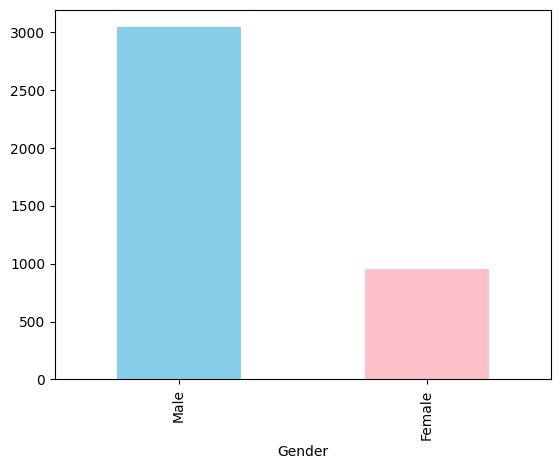

In [40]:
df['Gender'].value_counts().plot(kind = 'bar', color = ['skyblue', 'pink'])

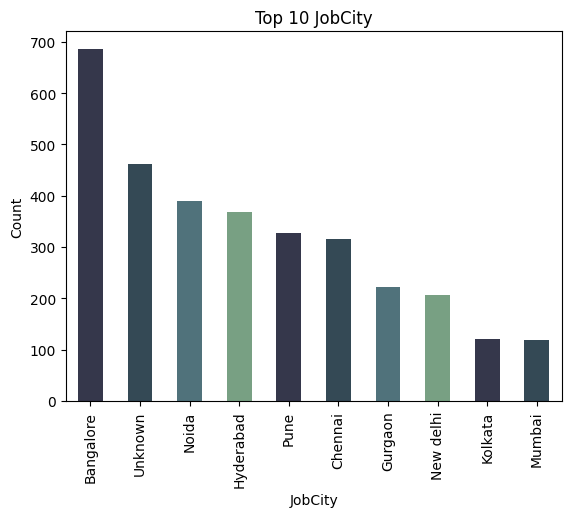

In [41]:
df['JobCity'].value_counts().head(10).plot(kind='bar', color=['#35374B', '#344955', '#50727B', '#78A083'])
plt.xlabel('JobCity')
plt.ylabel('Count')
plt.title('Top 10 JobCity')
plt.show()

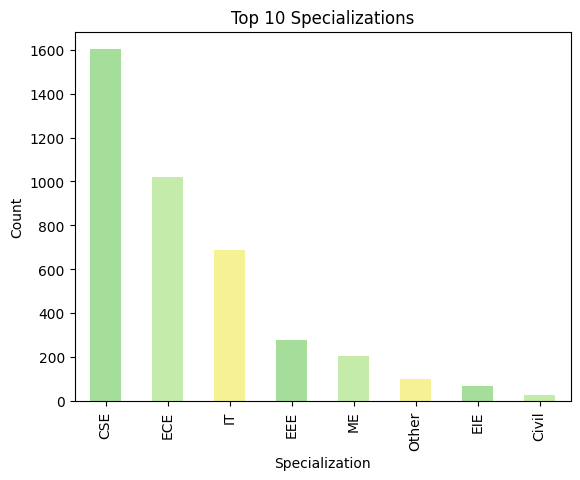

In [42]:
df['Specialization'].value_counts().head(10).plot(kind='bar', color=['#A5DD9B', '#C5EBAA', '#F6F193'])
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Top 10 Specializations')
plt.show()

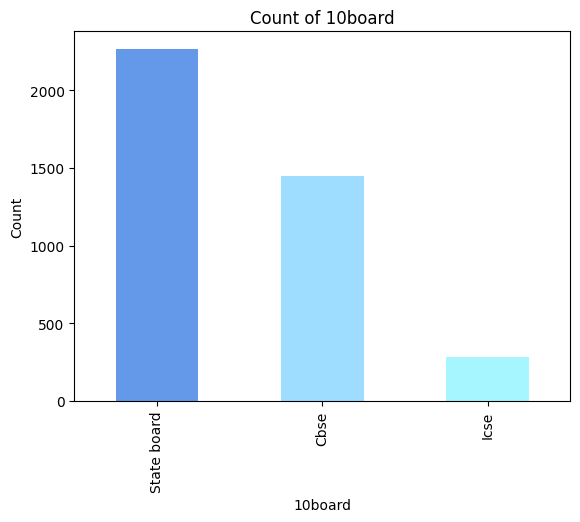

In [43]:
df['10board'].value_counts().plot(kind='bar', color=['#6499E9', '#9EDDFF', '#A6F6FF'])
plt.xlabel('10board')
plt.ylabel('Count')
plt.title('Count of 10board')
plt.show()

<Axes: xlabel='CollegeState'>

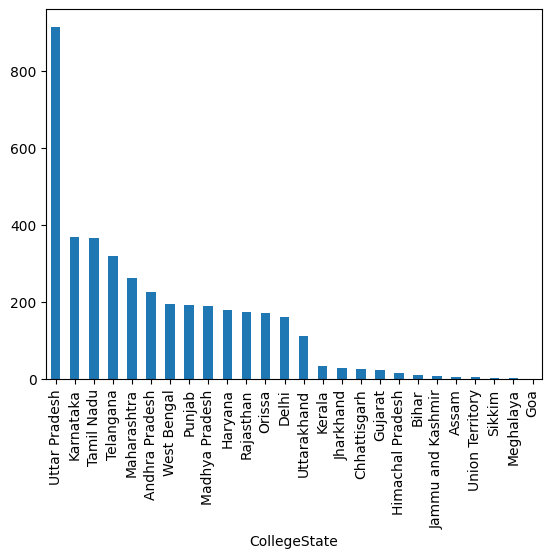

In [44]:
df['CollegeState'].value_counts().plot(kind = 'bar')

<Axes: xlabel='12board'>

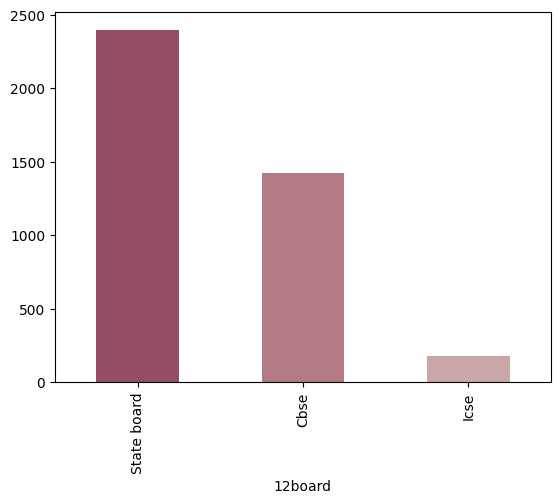

In [45]:
df['12board'].value_counts().plot(kind = 'bar', color=['#944E63', '#B47B84', '#CAA6A6'])

* Based on 10board & 12board most of the people are from State Board and least are ICSE.

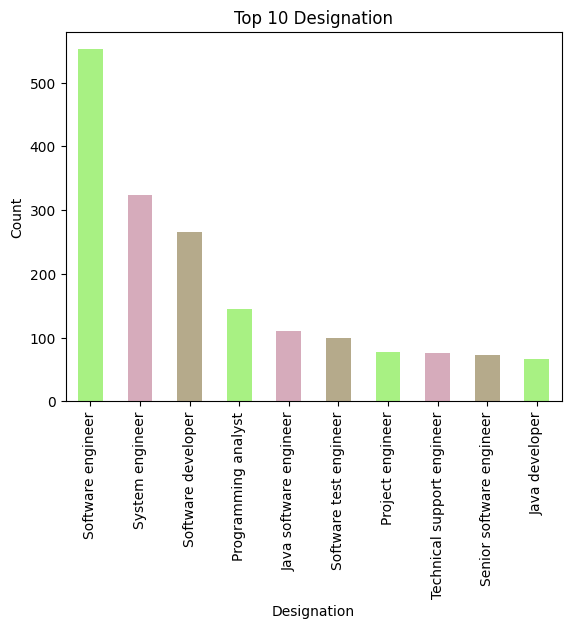

In [76]:
df['Designation'].value_counts().head(10).plot(kind='bar', color=[ '#A8F183','#D6ABBB','#B5AA8B'])
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Top 10 Designation')
plt.show()

* Most ofthem work in Software Engineering, while the fewest work as Java Developers.

In [45]:
categorical.columns

Index(['Unnamed: 0', 'DOL', 'Designation', 'JobCity', 'Gender', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

##### Numerical

In [46]:
numerical.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Jobworkingday'],
      dtype='object')

In [47]:
print('The minimum of salary is :', df['Salary'].min() )
print('The maximum of salary is :', df['Salary'].max() )
print('The average of salary is :', df['Salary'].mean() )

The minimum of salary is : 35000
The maximum of salary is : 4000000
The average of salary is : 307699.8499249625


<Axes: xlabel='Salary', ylabel='Density'>

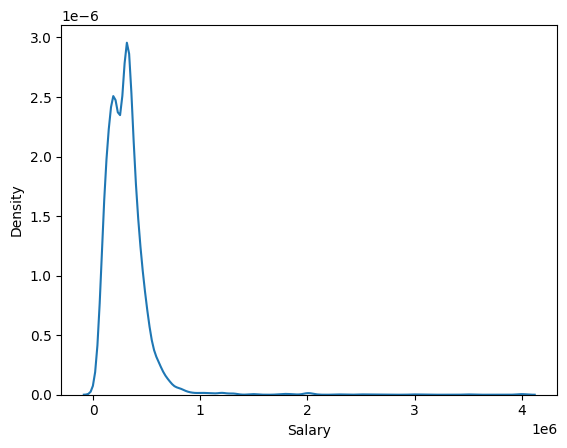

In [48]:
sns.kdeplot(data=df, x='Salary')

<Axes: ylabel='Frequency'>

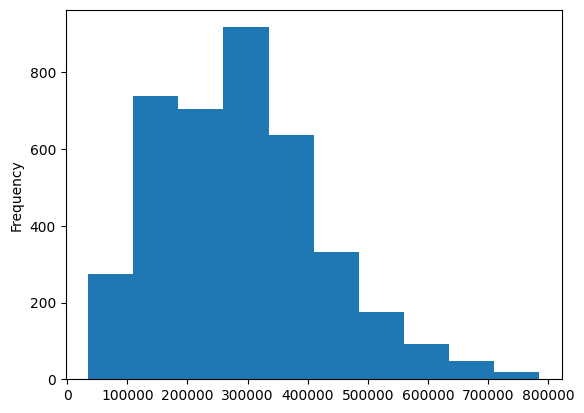

In [49]:
df[df['Salary']< 800000]['Salary'].plot(kind='hist')

<Axes: ylabel='Frequency'>

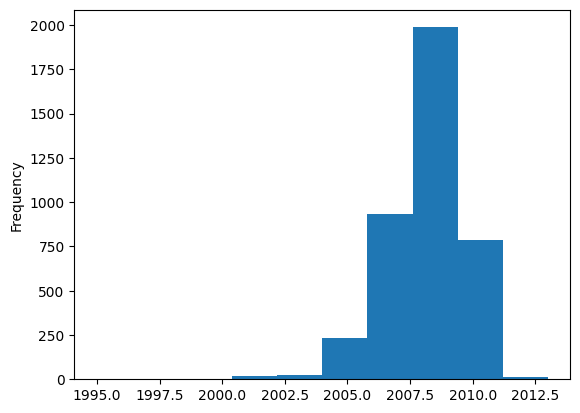

In [50]:
df['12graduation'].plot(kind = 'hist')

#### Grade columns

In [51]:
scores = ["English", "Logical", "Quant", "Domain", "ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg", "conscientiousness", "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]

In [52]:
df[scores]

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [53]:
df[scores].describe()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


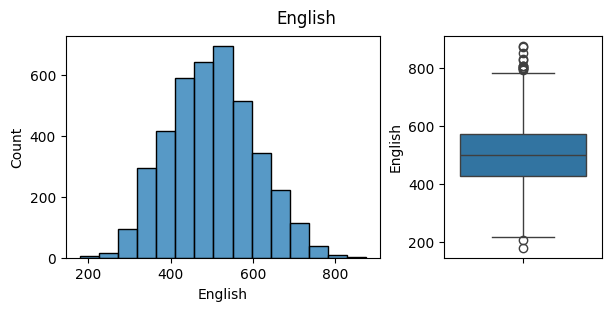

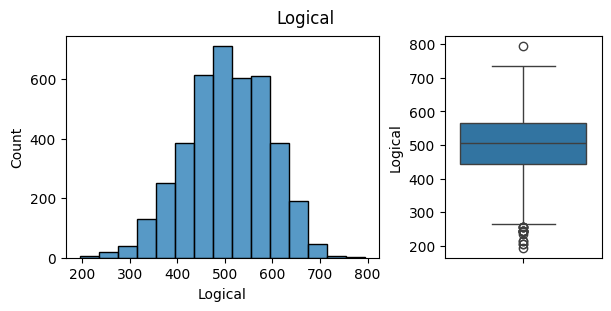

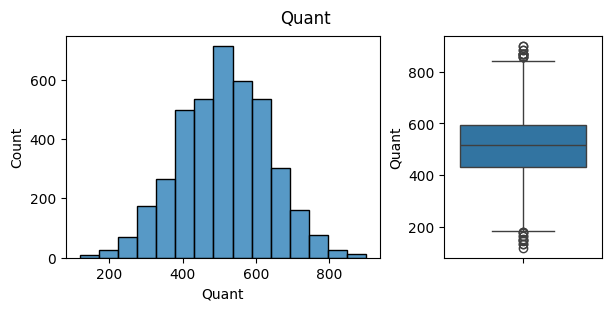

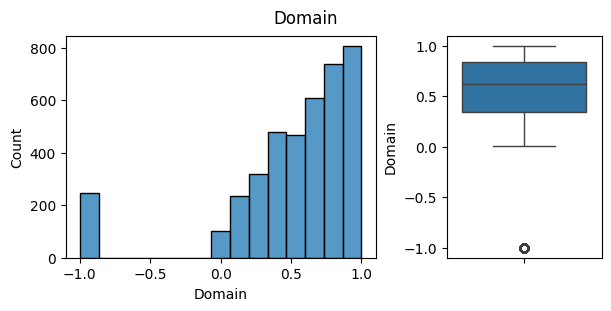

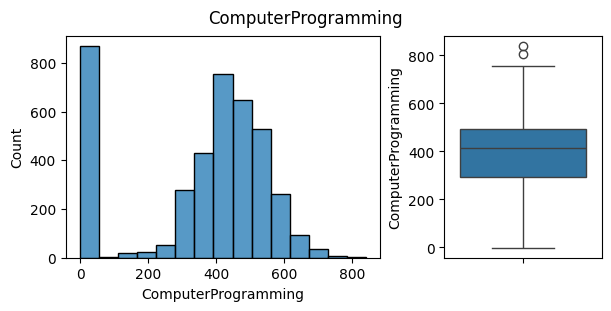

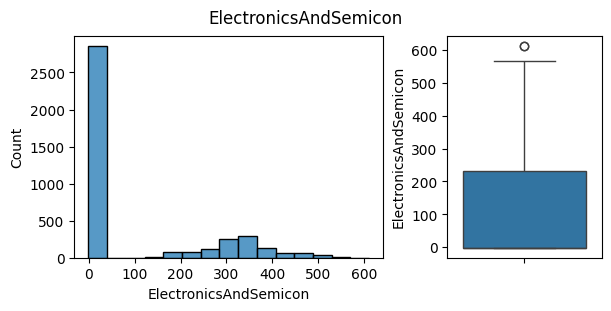

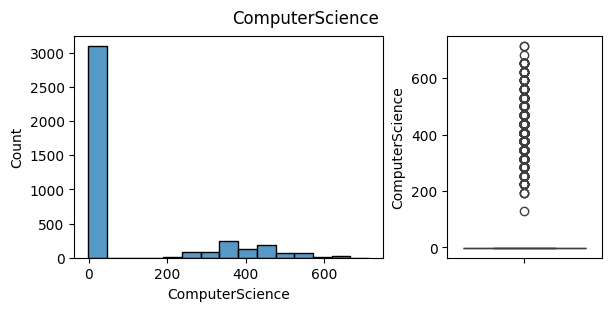

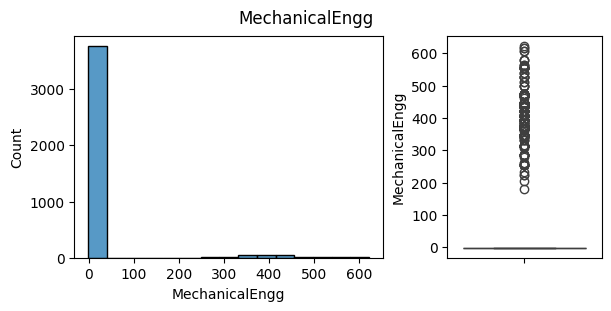

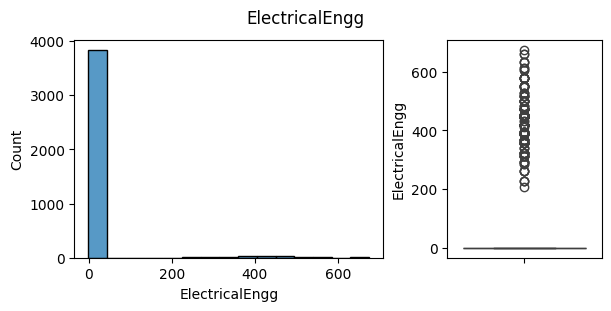

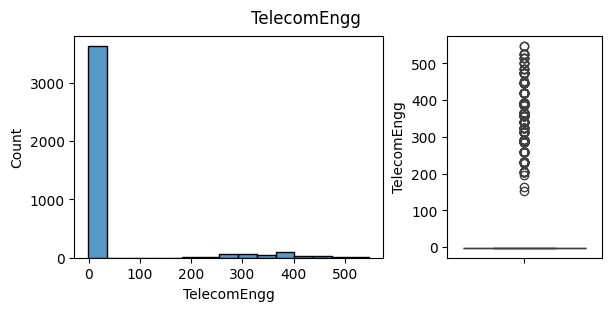

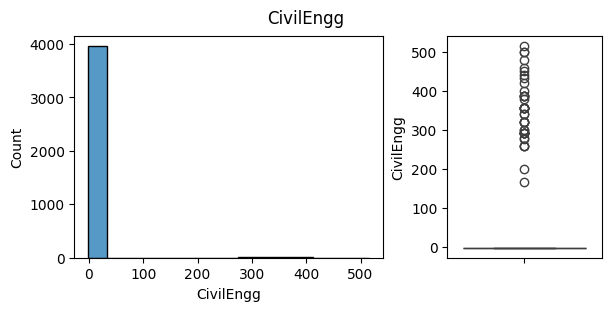

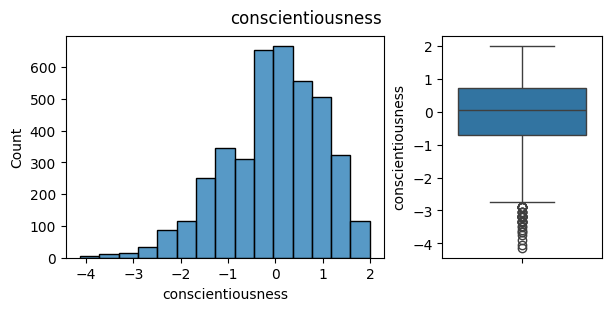

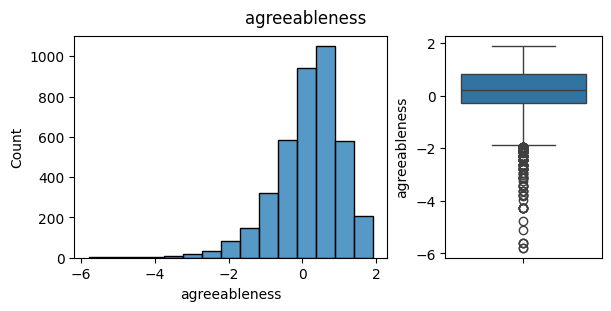

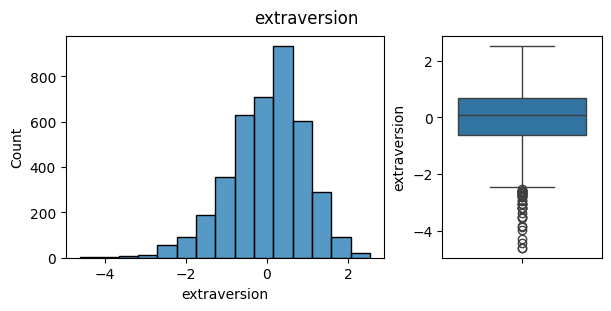

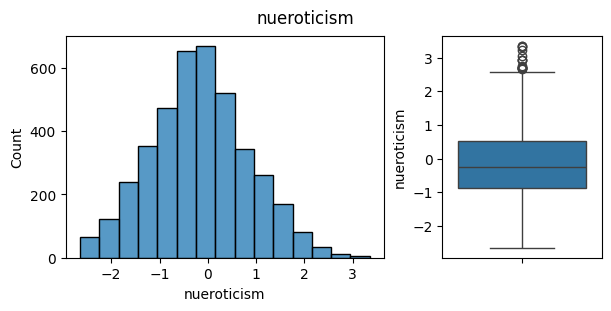

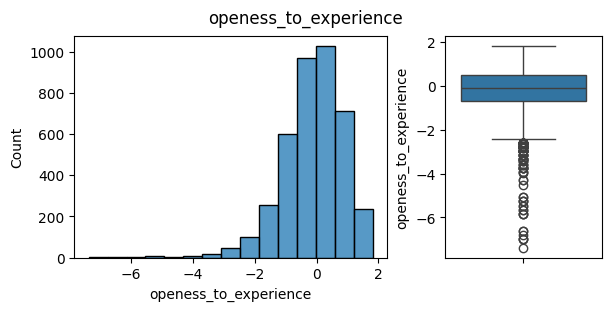

In [54]:
for i in df[scores]: 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3), constrained_layout=True,  gridspec_kw={'width_ratios': [4, 2]}) 
    sns.histplot(df[i], ax=ax1, bins=15) 
    sns.boxplot(df[i], ax=ax2) 
    plt.suptitle(i) 
    plt.show()

In [55]:
numerical.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Jobworkingday
0,203097,420000,84.3,2007,95.8,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,NaN,4292.0
1,579905,500000,85.4,2007,85.0,5807,2,70.06,5807,0,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,NaN,0.3789,1.2396,NaN,0.8637,3835.0
2,810601,325000,85.0,2010,68.2,64,2,70.00,64,0,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,NaN,0.6721,3562.0
3,267447,1100000,85.6,2007,83.6,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,NaN,NaN,NaN,4628.0
4,343523,200000,78.0,2008,76.8,11368,2,73.90,11368,0,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09163,NaN,365.0


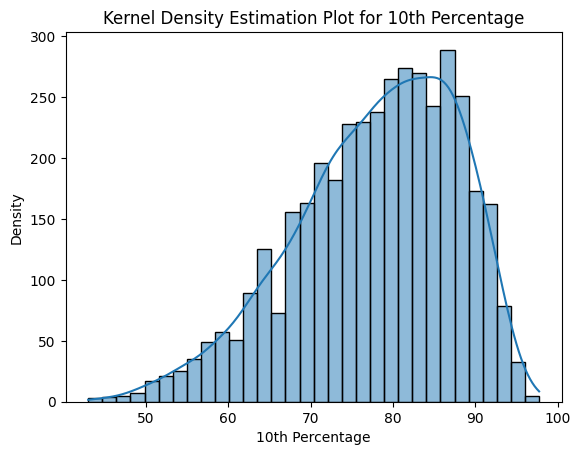

In [39]:
sns.histplot(data=df, x='10percentage', kde = True)
plt.xlabel('10th Percentage')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot for 10th Percentage')
plt.show()

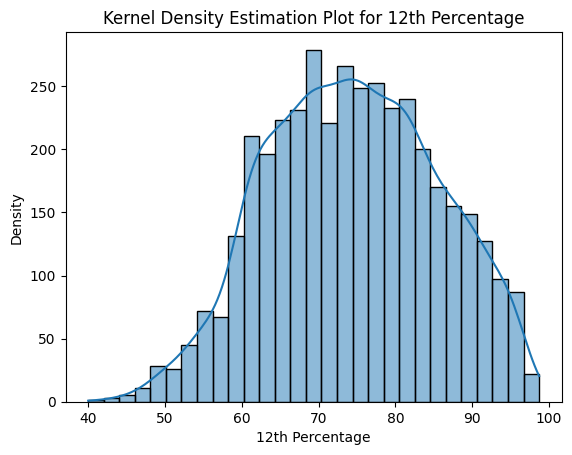

In [40]:
sns.histplot(data=df, x='12percentage', kde = True)
plt.xlabel('12th Percentage')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot for 12th Percentage')
plt.show()

## Datetime columns

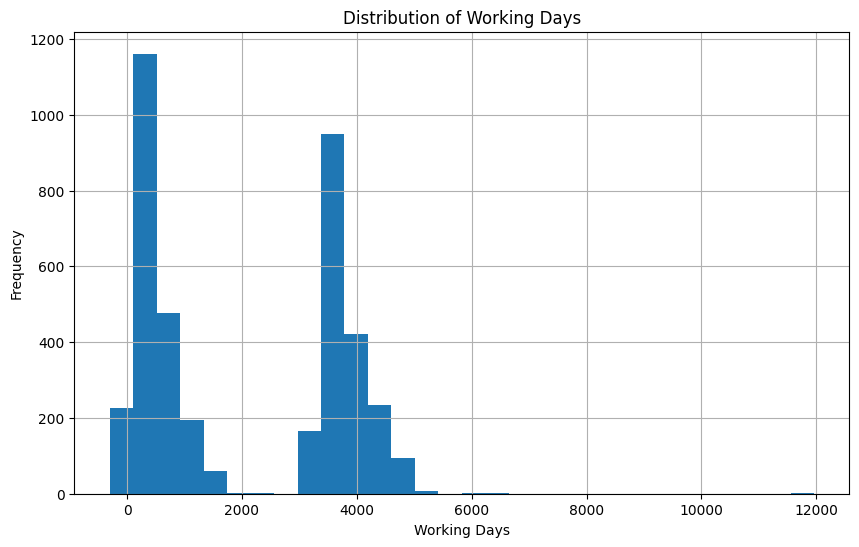

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df['Jobworkingday'], bins=30) 
plt.title('Distribution of Working Days')
plt.xlabel('Working Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: ylabel='Frequency'>

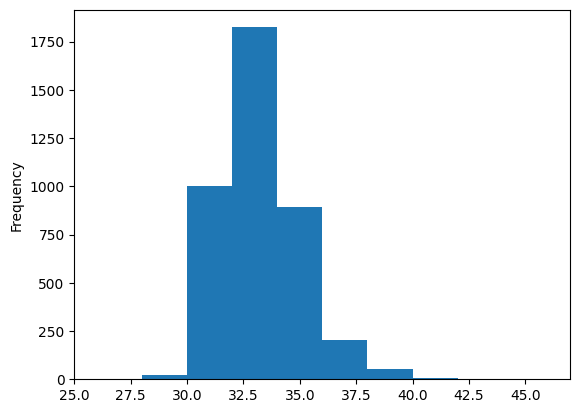

In [59]:
def DOB(age):
    today = date.today()
    Age = today.year - age.year - ((today.month, today.day) < (age.month, age.day))
    return Age
df['Age'] = df['DOB'].apply(DOB)
df['Age'].plot(kind='hist')

<Axes: xlabel='12graduation'>

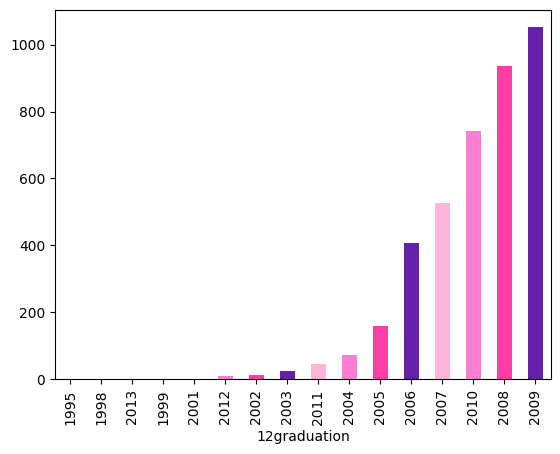

In [60]:
df['12graduation'].value_counts().sort_values().plot(kind='bar', color = ['#FFB5DA', '#FF7ED4', "#FF3EA5", '#6420AA'])

<Axes: xlabel='DOB'>

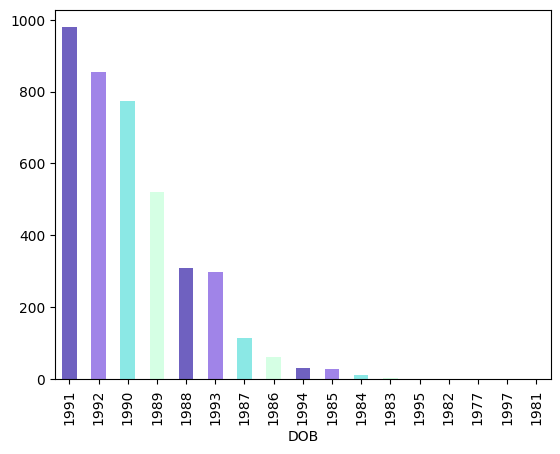

In [61]:
df['DOB'].dt.year.value_counts().plot(kind='bar', color = ['#6F61C0', '#A084E8', '#8BE8E5', '#D5FFE4'])

<Axes: xlabel='DOJ'>

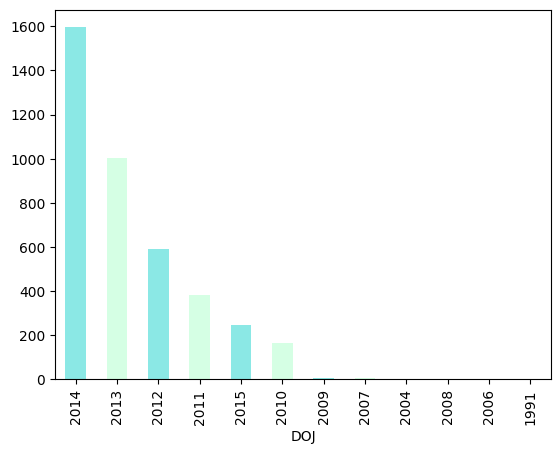

In [62]:
df['DOJ'].dt.year.value_counts().plot(kind='bar', color = ['#8BE8E5', '#D5FFE4'])

<Axes: xlabel='DOL'>

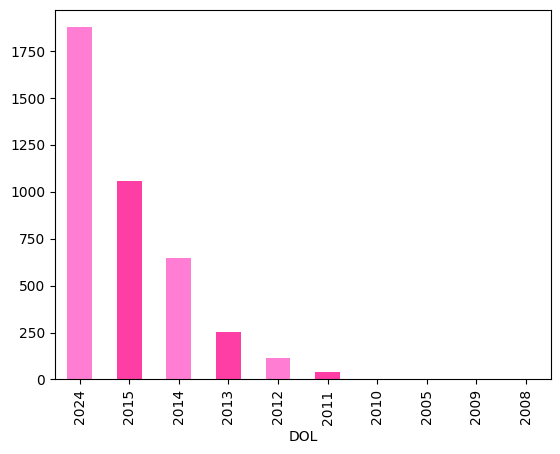

In [63]:
df['DOL'].dt.year.value_counts().plot(kind='bar', color = ['#FF7ED4', "#FF3EA5"])

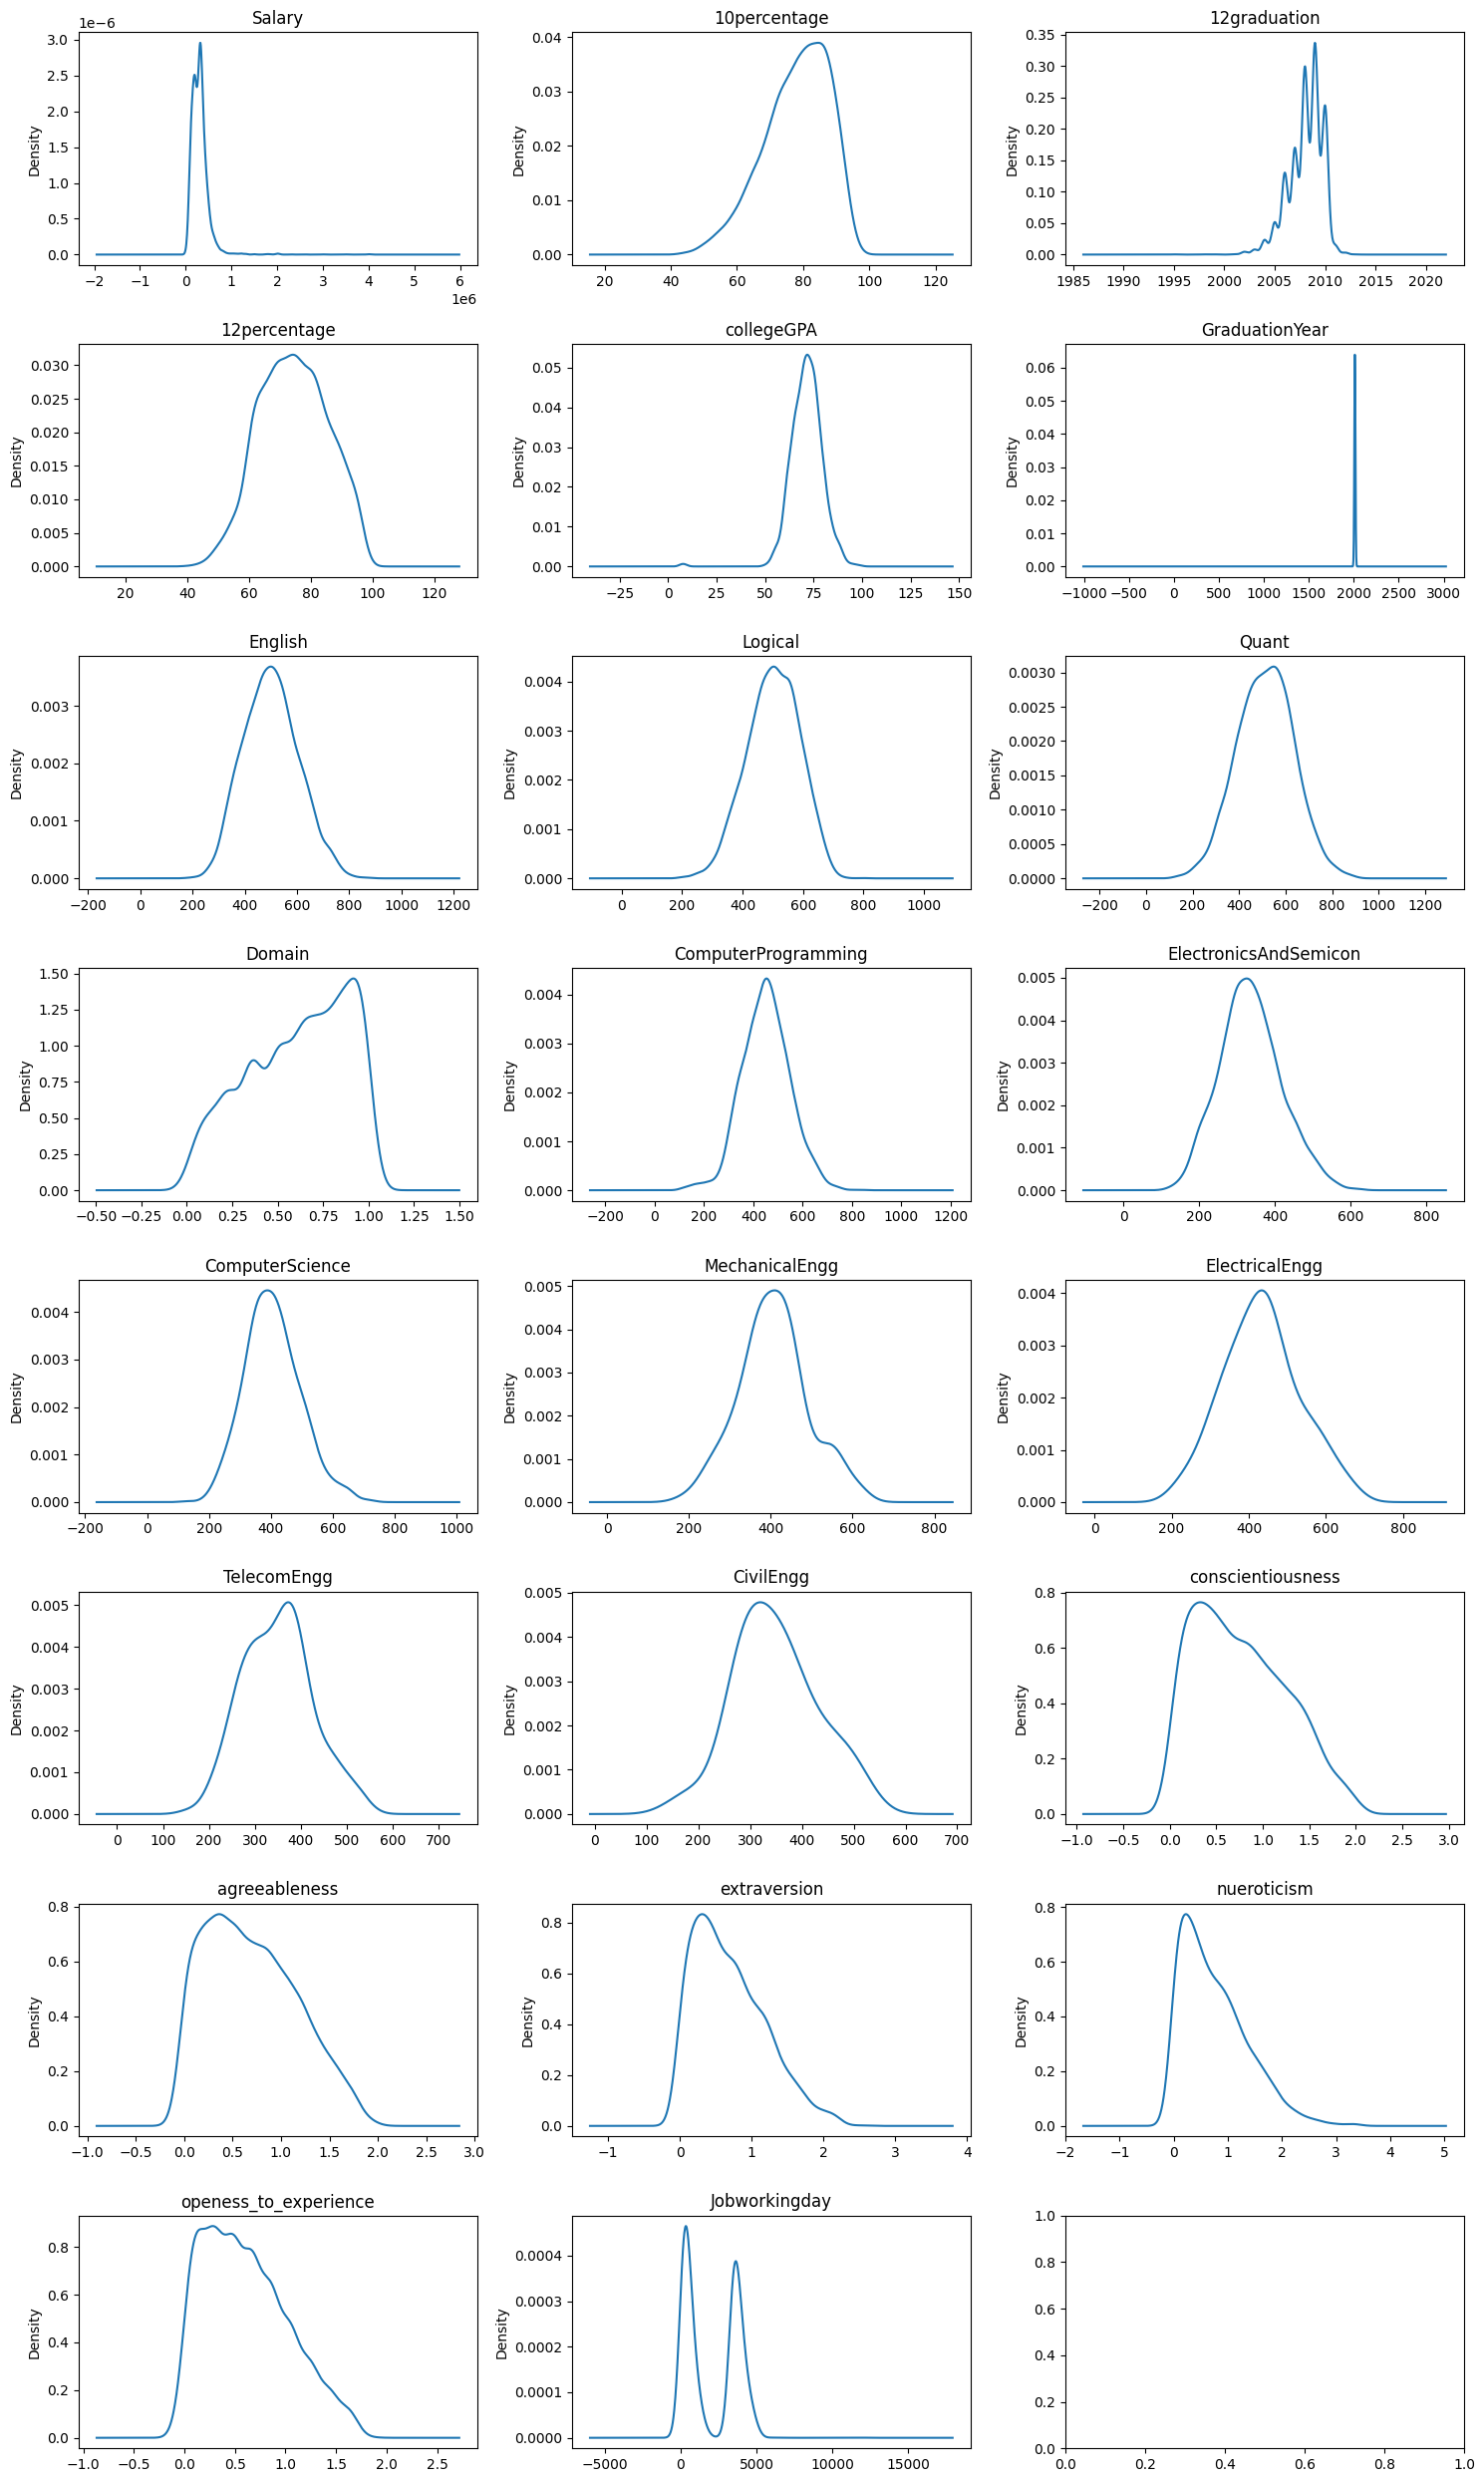

In [70]:
exclude = ['ID', 'CollegeID', 'CollegeCityID', 'CollegeTier', 'CollegeCityTier']
num_plot = [i for i in numerical.columns if i not in exclude]


fig, axes = plt.subplots(8, 3, figsize=(15, 25))

axes = axes.flatten()

for i, col in enumerate(num_plot):
    ax = axes[i]
    numerical[col].plot(kind='kde', ax=ax)
    ax.set_title(col)

for i in range(len(numerical.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Bi variate Analysis

## Categorical Vs Categorical

In [64]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Jobworkingday', 'Age'],
      dtype='object')

<Axes: xlabel='Gender'>

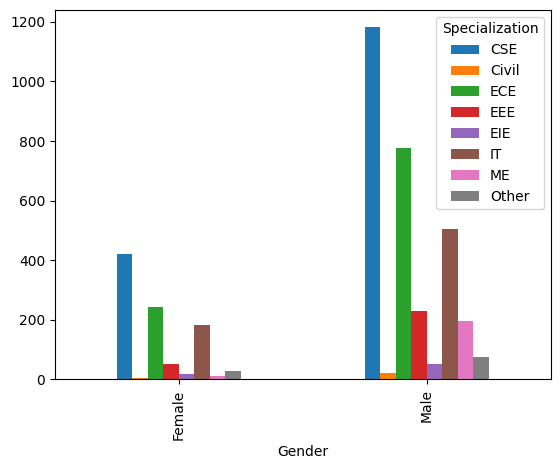

In [65]:
pd.crosstab(df['Gender'],df['Specialization']).plot(kind = 'bar')

<Axes: xlabel='Gender', ylabel='count'>

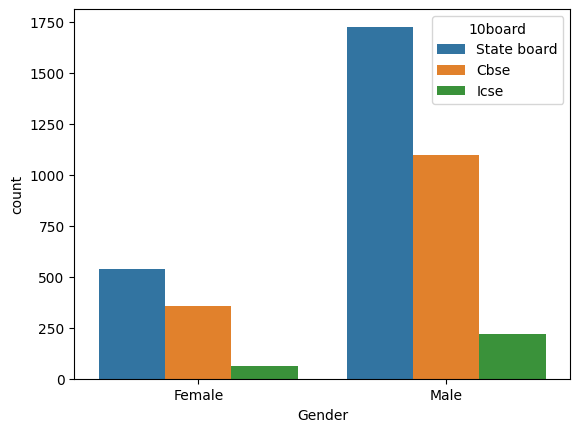

In [66]:
sns.countplot(data = df, x = 'Gender', hue = '10board')

<Axes: xlabel='Gender', ylabel='count'>

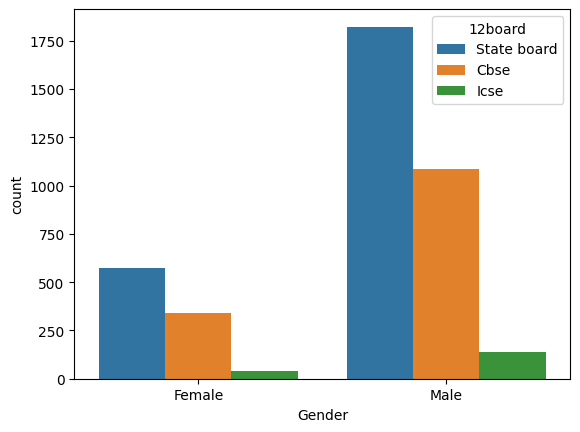

In [67]:
sns.countplot(data = df, x = 'Gender', hue = '12board')

* Both males and females have opted for their degree course as B.Tech/B.E, but there are more males than females in this category.

<Axes: xlabel='Degree', ylabel='count'>

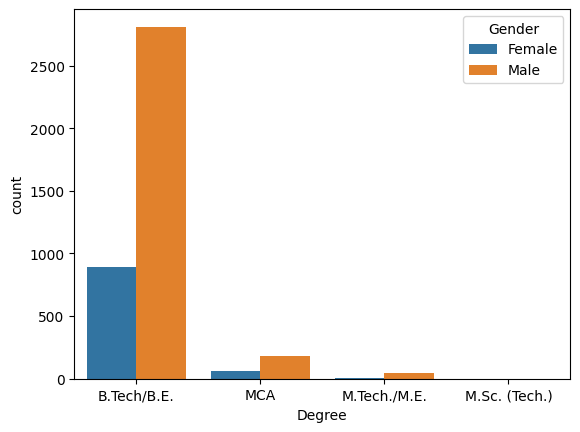

In [80]:
sns.countplot(data=df, x='Degree', hue='Gender')


* More males are studying for a B.Tech degree than any other degree.

## Catergorical vs Numerical

In [68]:
df.groupby('Gender')['10percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,957.0,80.932894,8.848698,48.8,75.00,82.4,87.63,97.12
Male,3041.0,76.979000,9.960078,43.0,70.66,78.0,85.00,97.76


<Axes: xlabel='Gender'>

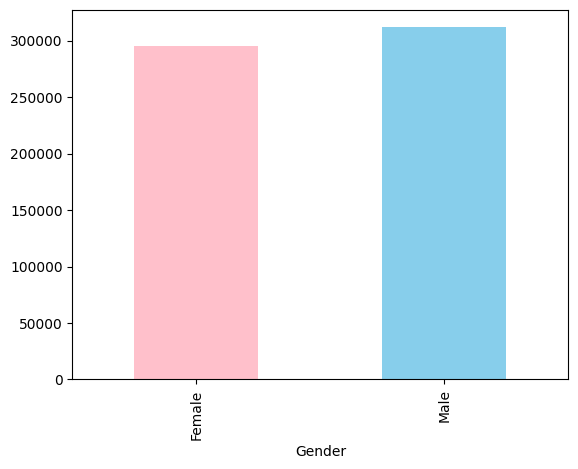

In [69]:
df.groupby(by='Gender')['Salary'].mean().plot(kind = 'bar', color = ['pink', 'skyblue'])

In [ ]:
sns.histplot(data = df['10percentage'], kde = True)

In [ ]:
exclude = ['ID', 'CollegeID', 'CollegeCityID', 'CollegeTier', 'CollegeCityTier']
includednumerical = [i for i in numerical.columns if i not in exclude]

In [ ]:
#sns.histplot(data = numerical, kde = True)

<Axes: xlabel='Degree', ylabel='Salary'>

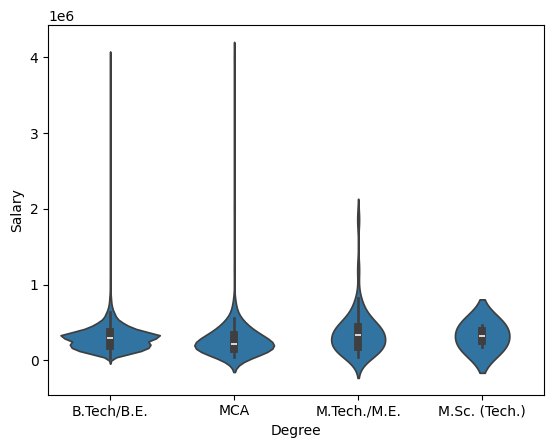

In [77]:
sns.violinplot(data = df, x = 'Degree', y = 'Salary')

<Axes: xlabel='Salary', ylabel='JobCity'>

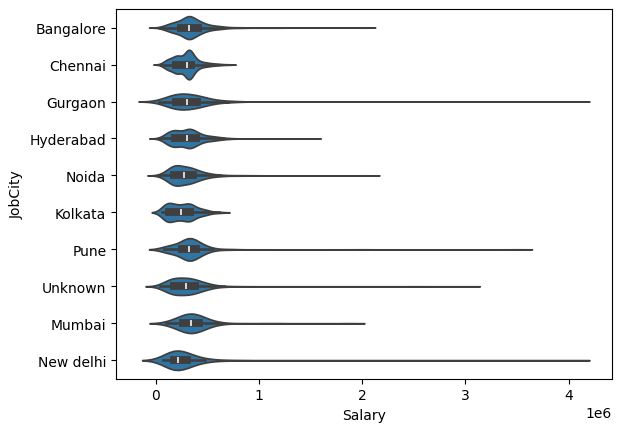

In [78]:
top_values = df['JobCity'].value_counts().head(10).index.tolist()
filtered_df = df[df['JobCity'].isin(top_values)]

# Create violin plot with filtered data
sns.violinplot(data=filtered_df, x='Salary', y='JobCity')

In [92]:
df.groupby('Specialization')['Salary'].describe().round(1).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Specialization,,,,,,,,
EEE,280.0,288375.0,215164.2,40000.0,180000.0,280000.0,340000.0,2500000.0
ECE,1021.0,295852.1,169280.2,40000.0,190000.0,300000.0,350000.0,3000000.0
IT,689.0,307460.1,174548.2,35000.0,180000.0,300000.0,390000.0,2000000.0
CSE,1601.0,313985.0,245704.2,35000.0,180000.0,300000.0,380000.0,4000000.0
ME,207.0,316202.9,210106.2,60000.0,180000.0,275000.0,400000.0,1300000.0
Other,103.0,317427.2,177185.0,100000.0,200000.0,305000.0,385000.0,1300000.0
EIE,68.0,347647.1,329631.7,50000.0,200000.0,300000.0,360000.0,2300000.0
Civil,29.0,381206.9,190528.7,110000.0,295000.0,320000.0,415000.0,800000.0


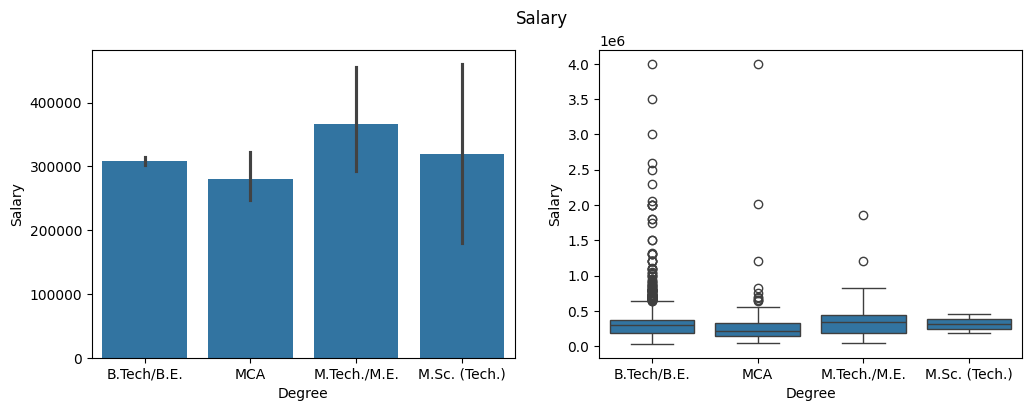

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

* M.Tech/M.E students are earning More than others, but B.Tech/B.E Students having more chances to earn better than M.Tech Students.

## Numerical VS Numerical

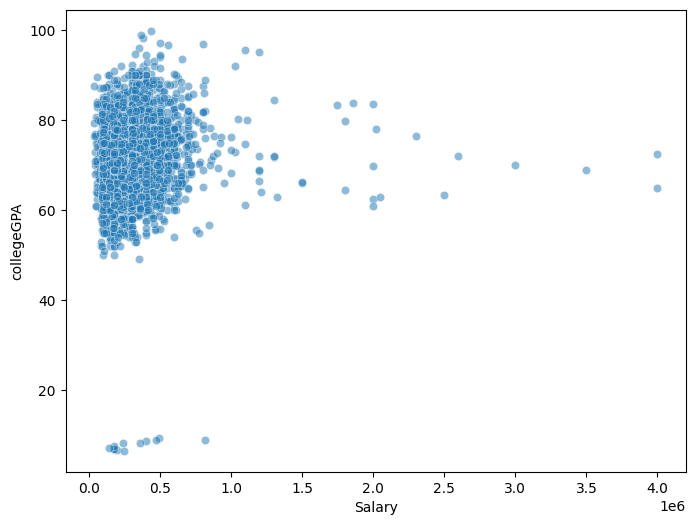

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x = 'Salary', y = 'collegeGPA', alpha=0.5)
plt.show()

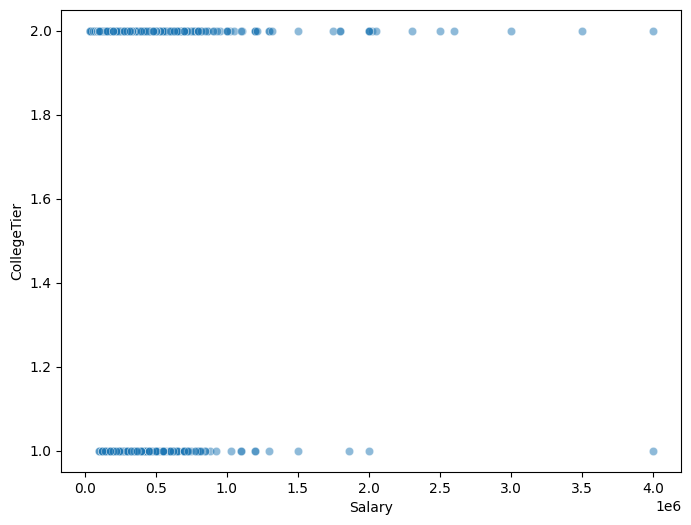

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x = 'Salary', y = 'CollegeTier', alpha=0.5)
plt.show()

## Research Questions

 Research Questions
-Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
-Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [49]:
designation = df[(df['Designation'] == 'Programming analyst') | 
                 (df['Designation'] == 'Software engineer') | 
                 (df['Designation'] == 'Hardware Engineer') |  
                 (df['Designation'] == 'Associate Engineer')]

In [50]:
designation['Salary'].mean()

340208.03443328553

In [51]:
designation

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Jobworkingday
19,train,466888,325000,2014-09-01,2024-03-02,Software engineer,Pune,Female,1990-11-30,79.00,Cbse,2008,62.20,Cbse,7977,2,B.Tech/B.E.,CSE,76.30,7977,0,Uttar Pradesh,2012,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,3470
20,train,140069,320000,2010-11-01,2012-09-01,Software engineer,Bangalore,Female,1988-07-25,91.20,State board,2006,84.63,State board,4437,2,B.Tech/B.E.,CSE,78.15,4437,0,Karnataka,2010,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,670
21,train,339689,200000,2012-08-01,2013-12-01,Software engineer,Unknown,Female,1991-08-20,75.67,State board,2007,74.40,State board,11368,2,B.Tech/B.E.,IT,74.01,11368,0,Uttar Pradesh,2012,385,555,445,0.635979,445,-1,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,487
24,train,963123,335000,2014-06-01,2015-06-01,Programming analyst,Hyderabad,Male,1993-06-28,88.00,State board,2010,90.00,State board,9173,2,B.Tech/B.E.,CSE,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,365
31,train,1094324,340000,2014-08-01,2015-04-01,Software engineer,Bangalore,Male,1992-10-23,77.20,State board,2010,86.10,State board,7282,2,B.Tech/B.E.,CSE,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,train,212055,550000,2013-07-01,2014-04-01,Software engineer,Bangalore,Male,1989-07-22,69.16,State board,2006,65.66,State board,278,1,M.Tech./M.E.,CSE,77.50,278,0,Uttar Pradesh,2013,395,435,645,0.990009,655,-1,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354,274
3981,train,1077872,220000,2014-09-01,2024-03-02,Software engineer,Gurgaon,Male,1991-12-17,53.40,Cbse,2009,65.40,Cbse,3879,2,B.Tech/B.E.,CSE,71.20,3879,0,Madhya Pradesh,2013,560,420,645,0.953900,575,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,3470
3984,train,305041,480000,2011-12-01,2024-03-02,Software engineer,Gurgaon,Female,1990-01-18,89.80,Cbse,2007,83.80,Cbse,5232,2,B.Tech/B.E.,CSE,70.00,5232,0,Haryana,2011,535,455,525,0.843124,515,-1,-1,-1,-1,-1,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082,4475
3989,train,1204604,300000,2014-09-01,2024-03-02,Software engineer,Bangalore,Male,1991-11-23,74.88,State board,2010,82.55,State board,3572,2,B.Tech/B.E.,CSE,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721,3470


In [52]:
from scipy import stats as st

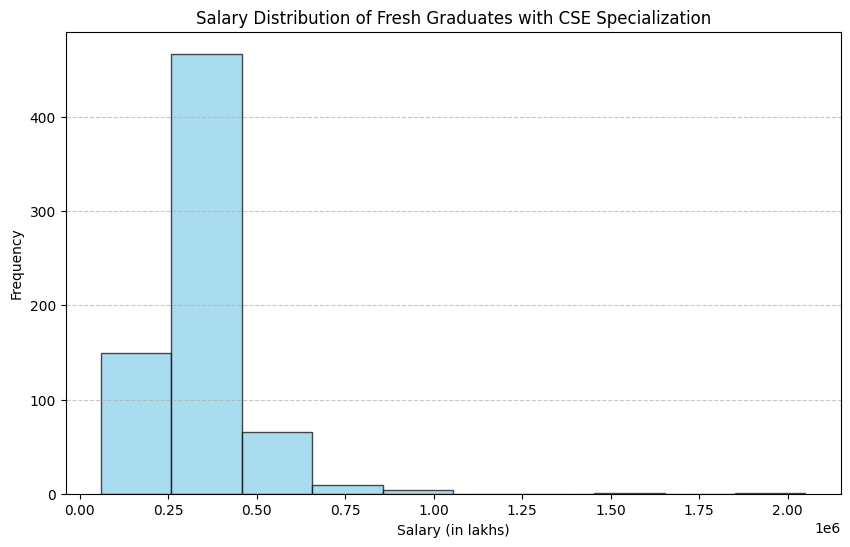

In [53]:
cse_salary = designation['Salary']

plt.figure(figsize=(10, 6))
plt.hist(cse_salary, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Salary Distribution of Fresh Graduates with CSE Specialization')
plt.xlabel('Salary (in lakhs)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [101]:
salmean = designation['Salary'].mean()
standard_error = st.sem(designation['Salary'])

ci= st.norm.interval(0.95, loc=salmean, scale=standard_error)
if ci[0] > 250000 or ci[1] < 300000:
    print('We reject the null hypothesis and average salary is not between 250k and 300k.')
else:
    print('We fail to reject the null hypothesis and average salary is between 250k and 300k.')

We reject the null hypothesis and average salary is not between 250k and 300k.


In [105]:
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df['Gender'], df['Specialization']))
alpha = 0.05

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 54.29437161697325
P-value: 2.05672752454147e-09


In [106]:
if p_value < alpha:
    print("There is a significant difference in specialization depending on gender.")
else:
    print("There is no significant difference in specialization depending on gender.")

There is a significant difference in specialization depending on gender.


<Axes: xlabel='Specialization', ylabel='count'>

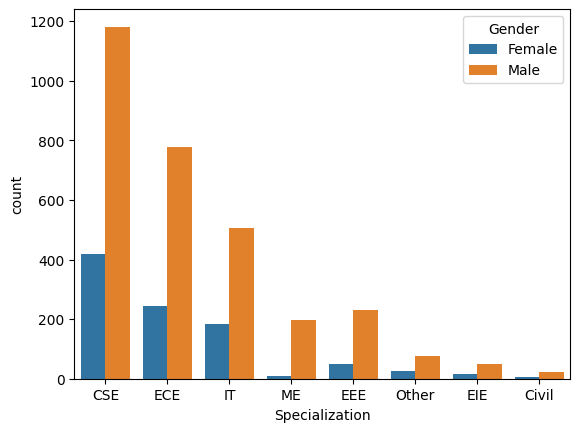

In [47]:
sns.countplot(data=df, x='Specialization', hue='Gender')

* The data suggests a potential relationship between gender and specialization, implying that specialization preference might depend on gender.

## Conclusion

* The dataset highlights a gender imbalance, underscoring the necessity for diversity initiatives in the workforce.
* Technical skills, particularly in Computer Science and Engineering, are in high demand based on the prevalence of related degrees.
* Job roles vary widely, with Software Engineer being the most common, followed by Developer.
* Educational board preferences influence policies, with a preference for State Boards, CBSE, and ICSE.
* Technical expertise is crucial, as evidenced by the prevalence of Bachelor of Technology/Engineering graduates.
* Managerial and technical positions are the highest-earning roles.
* College tier impacts earnings, with Tier-1 graduates earning more.
* Gender-based salary differences exist, though further analysis is needed for clarity.
* The claim about recent graduates' earnings in Computer Science Engineering was not supported by the data.
* There's no significant link between gender and specialization preference, challenging assumptions about their correlation.